In [1]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

In [2]:
data = pd.read_csv('aug_train.csv')

In [3]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
data.isna().any()

enrollee_id               False
city                      False
city_development_index    False
gender                     True
relevent_experience       False
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_size               True
company_type               True
last_new_job               True
training_hours            False
target                    False
dtype: bool

In [6]:
data.shape

(19158, 14)

## Dealing with missing data..

In [7]:
# Imputing gender with Mode of data..
genderMode = data['gender'].mode()
data.gender.fillna(genderMode[0], inplace = True)
data.gender.isna().any()

False

In [8]:
# Imputing enrolled University with mode as it is also a catagorical variable...
universityStatus = data.enrolled_university.mode()
data['enrolled_university'].fillna(universityStatus[0], inplace = True)
data.enrolled_university.isna().any()


False

In [9]:
educationLevel = data.education_level.mode()
data.education_level.fillna(educationLevel[0], inplace = True)
data.education_level.isna().any()

False

In [10]:
major = data.major_discipline.mode()
data.major_discipline.fillna(major[0], inplace = True)

In [11]:
# Imputing experience with Median as it is a discrete variable...
data['experience'].replace({'>20':20, '<1':0}, inplace = True)
expMedian = data.experience.median()
expMedian
data['experience'].fillna(expMedian, inplace = True)

In [12]:
sizeMode = data.company_size.mode()
data['company_size'].fillna(sizeMode[0], inplace=True)

In [13]:
typeMode = data.company_type.mode()
data['company_type'].fillna(typeMode[0], inplace = True)

In [14]:
data.last_new_job.unique()
data.replace({'>4':5, 'never':0}, inplace = True)
lastNewMedian = data.last_new_job.median()
data.last_new_job.fillna(lastNewMedian, inplace = True)

In [15]:
data.isna().any()

enrollee_id               False
city                      False
city_development_index    False
gender                    False
relevent_experience       False
enrolled_university       False
education_level           False
major_discipline          False
experience                False
company_size              False
company_type              False
last_new_job              False
training_hours            False
target                    False
dtype: bool

In [16]:
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [17]:
data.city = data.city.map(lambda city: city.strip('city_'))
data.city = data.city.astype(int)

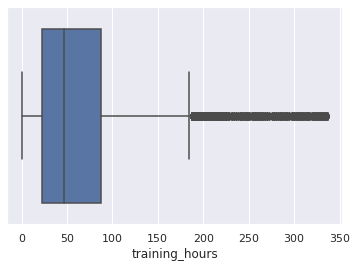

In [18]:
sns.boxplot(data.training_hours)

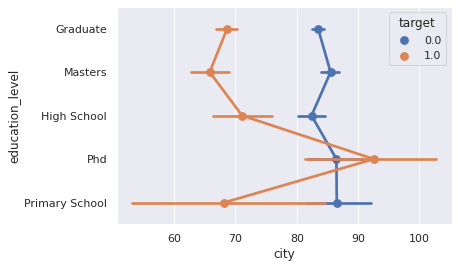

In [19]:
sns.pointplot(x=data.city, y=data.education_level, hue=data.target)

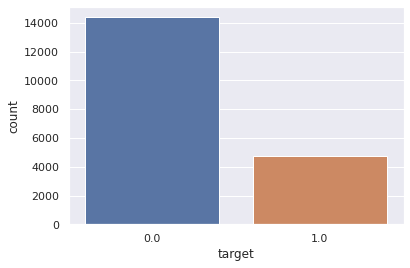

In [20]:
# sns.swarmplot(data.training_hours, data.company_type)
sns.countplot(data.target)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
# Label Encoding Gender Column F = 0, M = 1, Other = 2
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])
data.gender.unique()

array([1, 0, 2])

In [23]:
# Has Relevent Experience = 0, not having Relevant Experience = 1
data['relevent_experience'] = encoder.fit_transform(data['relevent_experience'])


In [24]:
# 'no_enrollment' = 2, 'Full time course' =0, 'Part time course = 1'
data['enrolled_university'] =encoder.fit_transform(data['enrolled_university'])

In [25]:
# 'Graduate' = 0, 'Masters' = 2, 'High School' = 1, 'Phd' = 3, 'Primary School' = 4
data['education_level'] = encoder.fit_transform(data['education_level'])
data['education_level'].unique()

array([0, 2, 1, 3, 4])

In [26]:
# 'STEM' = 5, 'Business Degree' = 1, 'Arts' = 0, 'Humanities' = 2, 'No Major' = 3, 'Other' = 4
data['major_discipline'] = encoder.fit_transform(data['major_discipline'])
data['major_discipline'].unique()

array([5, 1, 0, 2, 3, 4])

In [27]:
data['experience']=data['experience'].astype(int)

In [28]:
# '50-99'=4 '<10'=7 '10000+'=3 '5000-9999'=6 '1000-4999'=2 '10/49'=0 '100-500'=1, '500-999'=5
data['company_size'] = encoder.fit_transform(data['company_size'])
data['company_size'].unique()

array([4, 7, 3, 6, 2, 0, 1, 5])

In [29]:
data['company_type'] = encoder.fit_transform(data['company_type'])

In [30]:
data['last_new_job'] = data['last_new_job'].astype(int)

In [31]:
data['target'] = data['target'].astype(int)

In [32]:
data.dtypes

enrollee_id                 int64
city                        int64
city_development_index    float64
gender                      int64
relevent_experience         int64
enrolled_university         int64
education_level             int64
major_discipline            int64
experience                  int64
company_size                int64
company_type                int64
last_new_job                int64
training_hours              int64
target                      int64
dtype: object

# Creating the machine Learning model..

In [33]:
features = data.drop('target', axis = 1).values
target = data['target'].values

In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
oversampled_features, oversampled_target = smote.fit_resample(features,target)



Counter({1: 14381, 0: 14381})

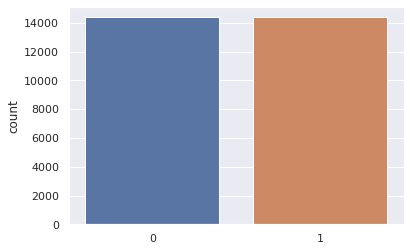

In [44]:
# from sklearn.preprocessing import OneHotEncoder
# oneHot = OneHotEncoder(sparse=False)
# oneHotData = oneHot.fit_transform(features)
sns.countplot(oversampled_target)
oversampled_target

from collections import Counter
counter = Counter(oversampled_target)
counter

In [45]:
from sklearn.model_selection import train_test_split
xTrain,  xTest, yTrain, yTest = train_test_split(oversampled_features,oversampled_target)

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=True, max_iter=500, penalty='l2')
model.fit(xTrain,yTrain)

LogisticRegression(max_iter=500)

In [47]:
predictions = model.predict(xTest)

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions,yTest)

array([[2264, 1317],
       [1352, 2258]])

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, yTest)

0.6288416075650118

In [50]:
from sklearn.naive_bayes import MultinomialNB
nbModel = MultinomialNB()
nbModel.fit(xTrain,yTrain)
predictions = nbModel.predict(xTest)
accuracy_score(predictions, yTest)

0.5630649422889723

In [51]:
from sklearn.tree import DecisionTreeClassifier
treeModel = DecisionTreeClassifier()
treeModel.fit(xTrain,yTrain)
predictions = treeModel.predict(xTest)
accuracy_score(predictions,yTest)

0.7937699902656098

In [53]:
print(treeModel.score(xTrain,yTrain))
print(treeModel.score(xTest,yTest))

1.0
0.7937699902656098


In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(xTrain,yTrain)
predictions = knn.predict(xTest)
print(knn.score(xTest,yTest))
print(knn.score(xTest,yTest))

0.6789041857877903
0.6789041857877903


In [55]:
treeModel.fit(xTrain, yTrain)
predictions = treeModel.predict(xTest)
print(accuracy_score(predictions,yTest))
print(treeModel.score(xTrain,yTrain))
print(treeModel.score(xTest,yTest))

0.7989153108051731
1.0
0.7989153108051731


In [56]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(xTrain,yTrain)
predictions = forest.predict(xTest)
print(accuracy_score(predictions, yTest))
print(forest.score(xTrain,yTrain))
print(forest.score(xTest,yTest))

0.8474481991378111
0.9999536414630754
0.8474481991378111


In [39]:

n_estimators = [500,800,1000,1500,2000]
max_depth = [10,20,30,40,50,60,70,80]
max_depth.append(None)
min_samples_split = [2,5,10,15,20]
min_samples_leaf = [1,2,5,10,15,20]

In [40]:
grid_params = {'n_estimators':n_estimators,}


In [57]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# search = RandomizedSearchCV(estimator=forest, param_distributions=grid_params, n_iter=500,cv=5, verbose=2)
# search.fit(xTrain,yTrain)
# search = GridSearchCV(estimator=forest, param_grid=grid_params, cv=5, verbose=2,scoring='accuracy')
# search.fit(xTrain,yTrain)
tuned_forest = RandomForestClassifier(n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=10, bootstrap=True)
tuned_forest.fit(xTrain, yTrain)
tuned_forest_predictions = tuned_forest.predict(xTest)
print(confusion_matrix(yTest,tuned_forest_predictions))
print(accuracy_score(yTest, tuned_forest_predictions))

[[3161  455]
 [ 709 2866]]
0.838130997079683


In [ ]:
print(search.best_estimator_)
print(search.best_params_)
print(search.best_score_)
print(search.cv_results_())
print(search.decision_function)
print(search.decision_function)

In [58]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
adaBoost = AdaBoostClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(adaBoost, xTrain, yTrain, scoring='accuracy', cv=cv, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
adaBoost.fit(xTrain,yTrain)
predictions = adaBoost.predict(xTest)


In [75]:
print(accuracy_score(yTest,predictions))
print(adaBoost.score(xTrain,yTrain))

tuned_adaboost = AdaBoostClassifier(learning_rate = 0.5, n_estimators=1400)
tuned_adaboost.fit(xTrain, yTrain)
tuned_adaboost_predictions = tuned_adaboost.predict(xTest)
print(confusion_matrix(yTest, tuned_adaboost_predictions))
print(accuracy_score(yTest, tuned_adaboost_predictions))
print(tuned_adaboost.score(xTrain,yTrain))

0.851341955221805
0.8172546474433267
[[3314  302]
 [ 792 2783]]
0.8478653872896676
0.8476658476658476


In [60]:
from xgboost import XGBClassifier

In [76]:
xgbModel = XGBClassifier()
xgbModel.fit(xTrain,yTrain)
xgb_predictions = xgbModel.predict(xTest)

/home/chakshu/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[00:00:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [77]:
print(confusion_matrix(yTest, xgb_predictions))
print(accuracy_score(yTest,xgb_predictions))
print(xgbModel.score(xTrain, yTrain))

[[3232  384]
 [ 685 2890]]
0.851341955221805
0.9141439896156878


# Conclusion
## AdaBoost seems to be a likely model here as its a generalized model with highest accuracy above 85%
## SMOTE helps our model in understanding the dataset well by oversampling the data.

# Futher on...
## We can work on reducing the type1 and type 2 error in AdaBoost model.